In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [83]:
test_df=pd.read_csv("Data/Preprocessed/Rockburst_test_data.csv")

In [84]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Duration_days                19 non-null     int64  
 1   Energy_Unit_log              19 non-null     float64
 2   Energy_density_sqr           19 non-null     float64
 3   Volume_sqr                   19 non-null     float64
 4   Event_freq_unit_per_day_log  19 non-null     float64
 5   Energy_Joule_per_day_sqr     19 non-null     float64
 6   Volume_m3_per_day_sqr        19 non-null     float64
 7   Energy_per_Volume_log        19 non-null     float64
 8   Energy_per_Duration_log      19 non-null     float64
 9   Volume_Change_Rate_log       19 non-null     float64
 10  Intensity_Level_encoded      19 non-null     int64  
dtypes: float64(9), int64(2)
memory usage: 1.8 KB


In [100]:
test_df.head(19)

,Duration_days,Energy_Unit_log,Energy_density_sqr,Volume_sqr,Event_freq_unit_per_day_log,Energy_Joule_per_day_sqr,Volume_m3_per_day_sqr,Energy_per_Volume_log,Energy_per_Duration_log,Volume_Change_Rate_log,Intensity_Level_encoded
0,5,2.484907,16.892100,13.133376,1.163151,11.634921,8.555625,1.395086,1.163151,0.460584,3
1,4,1.945910,28.090000,7.480225,0.916291,22.071204,4.549689,1.161207,0.916291,0.427390,0
2,13,2.197225,17.073424,12.278016,0.479335,9.108324,5.712100,1.188790,0.479573,0.168769,1
3,7,1.386294,25.603600,19.695844,0.356975,17.766225,12.909649,0.516398,0.356675,0.414283,2
4,9,2.890372,22.600516,19.333609,1.060910,14.440000,11.854249,1.582328,1.060872,0.323934,2
5,9,2.484907,16.232841,24.443136,0.798408,9.455625,15.920100,1.170908,0.798508,0.366955,1
6,4,1.098612,1.464100,17.189316,0.405465,0.369664,12.559936,0.393657,0.405465,0.634458,0
7,6,1.945910,30.924721,16.345849,0.693147,22.877089,10.660225,0.909889,0.693147,0.434484,1
8,4,3.912023,41.203561,24.950025,2.583998,33.837489,19.298449,2.380454,2.583998,0.741104,3
9,11,3.044522,31.236921,21.058921,1.036027,20.684304,12.581209,1.678637,1.036092,0.279490,2


In [97]:
xgb_model, train_features = joblib.load("trained_models/xgboost_model_V3.pkl")
scaler=joblib.load("trained_models/scaler_V3.pkl")
# Ensure test features in same order
X_test = test_df[train_features]  
y_test=test_df["Intensity_Level_encoded"]



In [87]:
train_features

['Duration_days',
 'Energy_Unit_log',
 'Energy_density_sqr',
 'Volume_sqr',
 'Event_freq_unit_per_day_log',
 'Energy_Joule_per_day_sqr',
 'Volume_m3_per_day_sqr',
 'Energy_per_Volume_log',
 'Energy_per_Duration_log',
 'Volume_Change_Rate_log']

In [88]:
X_test_scaled = scaler.transform(X_test)  # No fit here!


In [98]:
y_pred=xgb_model.predict(X_test_scaled)

Accuracy: 0.5263
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.86      0.75         7
           1       0.20      0.20      0.20         5
           2       0.50      0.40      0.44         5
           3       1.00      0.50      0.67         2

    accuracy                           0.53        19
   macro avg       0.59      0.49      0.52        19
weighted avg       0.54      0.53      0.52        19



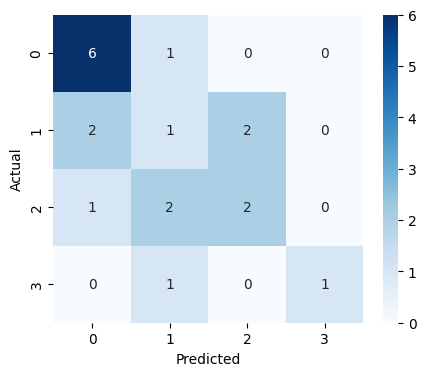

In [99]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", round(acc, 4))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()